In [1]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
import os
pd.set_option('display.max_rows', 50)

In [3]:
from fastparquet import ParquetFile

# Parquet File okuma
pf = ParquetFile("/kaggle/input/turkiye-is-bankasi-ml-challenge-5/train_final.parquet")

# Bir pandas dataFrame'ine dönüştürme
dataFrame = pf.to_pandas()

#Csv olarak kaydetme
#dataFrame.to_csv("train_final.csv", index = False)

In [4]:
# Parquet File okuma - test için!
pf_test = ParquetFile("/kaggle/input/turkiye-is-bankasi-ml-challenge-5/test_final.parquet")

# Bir pandas dataFrame'ine dönüştürme
df_test = pf_test.to_pandas()

#Csv olarak kaydetme
#dataFrame.to_csv("train_final.csv", index = False)

In [5]:
#dataFrame.shape

In [6]:
#dataFrame.head(10)

In [7]:
#dataFrame.info()

### dataFrame.describe().T #verimizin sayısal dağılımına bakıyoruz

In [8]:
#dataFrame.isnull().sum() #null değer yok

In [9]:
#dataFrame.isna().sum() # NA değer yok!

In [10]:
"""
for i in range(20):
    plt.figure(figsize=(10, 5))  
    for j in range(10*i, 10*(i+1)):
        col = 'feature_{}'.format(j)
        sns.distplot(dataFrame[col], label=col, hist=False)
    
    plt.legend()
    plt.xlabel("Value")
    plt.title(f"Feature Distributions for Features {10*i} to {10*(i+1)-1}")
    plt.show() """


'\nfor i in range(20):\n    plt.figure(figsize=(10, 5))  \n    for j in range(10*i, 10*(i+1)):\n        col = \'feature_{}\'.format(j)\n        sns.distplot(dataFrame[col], label=col, hist=False)\n    \n    plt.legend()\n    plt.xlabel("Value")\n    plt.title(f"Feature Distributions for Features {10*i} to {10*(i+1)-1}")\n    plt.show() '

In [11]:
#alpha = 0.05  

#for j in range(46):
    #col = 'feature_{}'.format(j)
    #stat, p = stats.shapiro(dataFrame[col])
    #if p > alpha:
        #print(f"{col}: Veri normal dağılıma uyar (p = {p:.4f})")
    #else:
        #print(f"{col}: Veri normal dağılıma uymaz (p = {p:.4f})")

In [12]:
#cat_cols = [col for col in dataFrame.columns if str(dataFrame[col].dtypes) in ["category", "object", "bool"]]
#dataFrame[cat_cols]

In [13]:
#num_but_cat = [col for col in dataFrame.columns if dataFrame[col].nunique() < 10 and dataFrame[col].dtypes in ["int", "float", "int64", "float64"]]
#dataFrame[num_but_cat]

In [14]:
#dataFrame['carrier'].unique()

In [15]:
#dataFrame['carrier'].nunique()

In [16]:
#dataFrame['devicebrand'].unique()

In [17]:
#dataFrame['devicebrand'].nunique()

In [18]:
#plt.figure(figsize=(10, 6))
#plt.bar(dataFrame['month'], dataFrame['n_seconds_1'], label='n_seconds_1')
#plt.bar(dataFrame['month'], dataFrame['n_seconds_2'], label='n_seconds_2', alpha=0.5)
#plt.bar(dataFrame['month'], dataFrame['n_seconds_3'], label='n_seconds_3', alpha=0.5)

#plt.title('Time Spent by Month')
#plt.xlabel('Month')
#plt.ylabel('Time (Seconds)')
#plt.legend()

#plt.tight_layout()
#plt.show()

In [19]:
# count the frequency of each category value
#counts = dataFrame['carrier'].value_counts()

# plot the pie chart
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
#plt.show()

In [20]:
carrier_kalanlar = ['TURKCELL', 'VODAFONE TR', 'TURK TELEKOM']

In [21]:
################## Ön işleme ###########################################################################

In [22]:
#df = dataFrame.copy()

In [23]:
def carrier_other(carr):
    if carr not in carrier_kalanlar:
        carr = 'other'
    else: pass
    
    return carr

In [24]:
#df['carrier'] = dataFrame['carrier'].apply(carrier_other)

In [25]:
# count the frequency of each category value
#counts = df['carrier'].value_counts()

# plot the pie chart
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
#plt.show()

In [26]:
# count the frequency of each category value
#counts = df['devicebrand'].value_counts()

# plot the pie chart
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
#plt.show()

In [27]:
devicebrand_kalanlar = ['Apple', 'samsung', 'Redmi', 'HUAWEI', 'OPPO']

In [28]:
def devicebrand_other(carr):
    if carr not in devicebrand_kalanlar:
        carr = 'other'
    else: pass
    
    return carr

In [29]:
#df['devicebrand'] = dataFrame['devicebrand'].apply(devicebrand_other)

In [30]:
# count the frequency of each category value
#counts = df['devicebrand'].value_counts()

# plot the pie chart
#plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
#plt.show()

In [31]:
#cat_but_car = [col for col in df.columns if
        #df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
#df[cat_but_car]

In [32]:
#num_but_cat

In [33]:
#df['id'].nunique()

In [34]:
#df.shape

In [35]:
#duplicated_ids = df.shape[0] - df['id'].nunique()
#duplicated_ids

In [36]:
# Aynı ayda sadece aynı id nin birden fazla olmadığını görmüş olduk!
#df[['id','month']].duplicated().unique()

In [37]:
#cat_cols = cat_cols + num_but_cat
#cat_cols = list(set(cat_cols))
#cat_cols = [col for col in cat_cols if col not in cat_but_car]
#df[cat_cols]

In [38]:
#num_cols = [col for col in dataFrame.columns if dataFrame[col].dtypes in ["int", "float", "int64", "float64"]]
#num_cols = [col for col in num_cols if col not in cat_cols]#

In [39]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##################################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [40]:
#for col in cat_cols:
    #cat_summary(dataFrame, col, plot=False)

In [41]:
"""
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={"size": 12}, linecolor="w", cmap="RdBu")
    plt.show(block=True) """

'\ndef correlation_matrix(df, cols):\n    fig = plt.gcf()\n    fig.set_size_inches(10, 8)\n    plt.xticks(fontsize=10)\n    plt.yticks(fontsize=10)\n    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={"size": 12}, linecolor="w", cmap="RdBu")\n    plt.show(block=True) '

In [42]:
#correlation_matrix(df, num_cols)

In [43]:
# Creating a cross-tabulation table to show the frequency distribution of 'devicebrand' within each 'carrier'
#cross_tab = pd.crosstab(df['carrier'], df['devicebrand'])

# Selecting the top 5 most frequent carriers and device brands
#top_5_carriers = df['carrier'].value_counts().head(5).index
#top_5_device_brands = df['devicebrand'].value_counts().head(5).index

# Filtering the data to include only the top 5 carriers and device brands
#filtered_data = df[df['carrier'].isin(top_5_carriers) & df['devicebrand'].isin(top_5_device_brands)]

# Creating a cross-tabulation table for the filtered data
#filtered_cross_tab = pd.crosstab(filtered_data['carrier'], filtered_data['devicebrand'])

# Creating a stacked bar chart for the cross-tabulation table
#plt.figure(figsize=(12, 8))
#filtered_cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))
#plt.title('Operatör Kırılımında Cihaz Dağılımları')
#plt.ylabel('Frekans')
#plt.xlabel('Operatör')
#plt.legend(title='Cihaz Markası')
#plt.show()

In [44]:
# Drop the month since it doesnt include each month in training data.
#df.drop('month',axis=1,inplace=True)
#df.columns

In [45]:
#cat_cols.remove('month')

In [46]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95): 
    q1 = 0.05
    q3 = 0.95
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 5 * interquantile_range
    low_limit = quartile1 - 5 * interquantile_range
    return low_limit, up_limit

In [47]:
def replace_with_threshoulds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [48]:
#df[num_cols]

In [49]:
#df['total_seconds'] = df['n_seconds_1']+df['n_seconds_2']+df['n_seconds_3']

In [50]:
#num_cols.append('total_seconds')

In [51]:
#for col in num_cols:
    #replace_with_threshoulds(df, col)

In [52]:
# df[num_cols]

In [53]:
#df[cat_cols]

In [54]:
#df.carrier.unique()

In [55]:
#df.devicebrand.unique()

In [56]:
def lof_remove(df, num_cols, n_neighbors=25):
    
    lof = LocalOutlierFactor(n_neighbors=25) #n_neghbours is an hyperparameter
    lof.fit(df[num_cols])
    #lof = LocalOutlierFactor(n_neighbors=25, metric='jaccard')
    #lof.fit(df)
    outlier_scores = lof.negative_outlier_factor_
    outlier_scores
    # A data point with an LOF score greater than 1 is considered an outlier, 
    #while a data point with an LOF score less than 1 is considered an inlier.
    
    df_dummy = df.copy()
    df_dummy['lof'] = outlier_scores
    
    pd.qcut(df_dummy['lof'],20)
    
    df_dummy = df_dummy.drop(df_dummy[df_dummy['lof'] < -1.108].index)
    df_dummy.drop(columns='lof',inplace=True)
    
    return df_dummy

In [57]:
#df = lof_remove(df)
#df

In [58]:
#df.isnull().sum()

In [59]:
def minmax_scaler(df, num_cols):
    import sys
    try:
        pass
        #df.reset_index(inplace=True)
    except:
        print('no_reset')
        #sys.exit('no_reset')
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(df[num_cols])

    normalized_dataFrame = pd.DataFrame(normalized_data, columns=num_cols)
    if normalized_dataFrame.isnull().sum().any():
        sys.exit('null value')
        
    return normalized_dataFrame[num_cols]


In [60]:
#df.shape

In [61]:
#scaler = MinMaxScaler()

In [62]:
#normalized_data = scaler.fit_transform(df[num_cols])

In [63]:
#normalized_data.shape

In [64]:
#normalized_dataFrame = pd.DataFrame(normalized_data, columns=num_cols)

In [65]:
#normalized_dataFrame

In [66]:
#normalized_dataFrame = minmax_scaler(df)

In [67]:
#normalized_dataFrame

In [68]:
#df[num_cols] = normalized_dataFrame.copy()

In [69]:
#df[num_cols]

In [70]:
#num_cols = df[num_cols].columns
#num_cols_chunks = [num_cols[i:i + 10] for i in range(0, len(num_cols), 10)]

#for chunk in num_cols_chunks:
    #plt.figure(figsize=(12, 6))
    #selected_data = df[chunk]
    #sns.violinplot(data=selected_data, inner="box")
    #plt.xlabel("Sütunlar")
    #plt.ylabel("Normalleştirilmiş Değerler")
    #plt.title(f"Sütunların Violin Grafiği: {', '.join(chunk)}")
    #plt.xticks(rotation=90)
    #plt.show()

In [71]:
#for i, column in enumerate(num_cols):

    #sns.histplot(df[column], kde=False, color='skyblue', bins=20)
    #plt.title('{} histogram plot'.format(column))
    #plt.show()
    #.set_title(f'{column} Dağılımı')

In [72]:
#target = 'target'

In [73]:
# Extracting unique values from the 'target' column
#unique_menu_vals = set(','.join(df[target]).split(',').strip())
#unique_menu_vals

In [74]:
# Boşluklardan kurtarıyoruz
#unique_menu_vals = set([menu.strip() for menu in unique_menu_vals])
#unique_menu_vals

In [75]:
#df['target_cleaned'] = df['target'].apply(lambda i: ','.join([value.strip() for value in i.split(',')]))
#df['target_cleaned']

In [76]:
# Recounting the occurrence of each unique target label
#cleaned_target_counts = Counter(','.join(df['target_cleaned']).split(','))

# Converting the Counter object to a DataFrame for easier visualization
#cleaned_target_counts_df = pd.DataFrame.from_dict(cleaned_target_counts, orient='index', columns=['count']).reset_index()
#cleaned_target_counts_df.columns = ['target', 'count']
#cleaned_target_counts_df = cleaned_target_counts_df.sort_values(by='count', ascending=False)

# Displaying the top 10 most occurring cleaned targets
#top_10_cleaned_targets = cleaned_target_counts_df.head(10)
#top_10_cleaned_targets
# Visualizing the distribution of the top 10 most occurring cleaned targets using a pie chart
#plt.figure(figsize=(10, 10))
#plt.pie(top_10_cleaned_targets['count'], labels=top_10_cleaned_targets['target'], autopct='%1.1f%%', startangle=140)
#plt.title('Pie-chart hedef değişken dağılımı')
#plt.show()

In [77]:
#df['top3_menus_average_time'] = (df['n_seconds_1']+df['n_seconds_2']+df['n_seconds_3'])/3
#df.head()

In [78]:
# Calculating the average time spent on each menu
#average_time_per_menu = menu_seconds_df.groupby('menu').mean()

In [79]:
#df[cat_cols]

In [80]:
#df_try = df.copy()

In [81]:
#cat_cols

In [82]:
#df_try

In [83]:
#df_try1 = pd.get_dummies(df_try[cat_cols],dtype=int, prefix=None, drop_first=True)
#df_try1

In [84]:
#df_tryc = pd.concat([df_try, df_try1], axis=1)
#df_tryc

In [85]:
#df = df_tryc.copy()
#df.drop(columns=['carrier','devicebrand','id'], inplace=True)
#df

In [86]:
# We encode the target feature
#df_encoded = df['target_cleaned'].str.split(',', expand=True).stack().str.get_dummies().groupby(level=0).sum()#.add_prefix('menu')

In [87]:
#df_try = df.copy()

In [88]:
#df_try[df_encoded.columns] = df_encoded

In [89]:
#df_try.isnull().sum()

In [90]:
#df.isnull().sum()

In [91]:
#df.shape

In [92]:
#df_encoded.shape

In [93]:
#df_conc = pd.concat([df, df_encoded], axis=1)

In [94]:
#df_conc.head()

In [95]:
#df_conc.columns

In [96]:
#df_conc.shape

In [97]:
#df_conc.isnull().sum()

In [98]:
#pip install --upgrade pandas

In [99]:
#df = df_conc.copy()

In [100]:
#df.drop(['target','target_cleaned'],axis=1,inplace=True)
#df.columns

In [101]:
#df.isnull().sum()

In [102]:
#targt_cols = ['menu'+str(i) for i in range(1,10)]
#targt_cols

In [103]:
#y = [df[col] for col in targt_cols]
#y

In [104]:
#df_dum = df.copy()
#df_dum

In [105]:
#y = df[targt_cols]
#y

In [106]:
# Rename columns
#new_column_names = {0: 'Ekim', 1: 'Kasım', 2: 'Aralık'}
#df_dum.rename(columns=new_column_names, inplace=True)
#df_dum.columns

In [107]:

#df_dum.drop(targt_cols,axis=1,inplace=True)
#train, test = train_test_split(X, y, 0.2)
#df_dum


In [108]:
#df_dum.columns

In [109]:
#X = df_dum.copy()
#X

In [110]:
#y1 = list(y['menu1'])
#y1[:10]

In [111]:
#X1 = X.head(20000)
#y1 = y1[:20000]

In [112]:
#X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Create an XGBRegressor model
#xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
#xg_reg.fit(X_train, y_train)

#y_pred = xg_reg.predict(X_test)

In [113]:
# Evaluate the model
#rmse = mean_squared_error(y_test, y_pred, squared=False)
#rmse

In [114]:
#y2 = list(y['menu2'])
#y2 = y2[:20000]

#X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size=0.2, random_state=42)

# Create an XGBRegressor model
#xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
#xg_reg.fit(X_train, y_train)

#y_pred2 = xg_reg.predict(X_test)

In [115]:
# Evaluate the model
#rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
#rmse2

In [116]:
#y_all = y

In [117]:
#Lets try all target together in XGBRegressor
#X_train, X_test, y_train, y_test = train_test_split(X, y_all, test_size=0.2, random_state=42)

# Create an XGBRegressor model
#xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
#xg_reg.fit(X_train, y_train)

#y_preds = xg_reg.predict(X_test)

In [118]:
# Evaluate the model
#rmse = mean_squared_error(y_test, y_preds, squared=False)
#rmse

In [119]:
#y_preds.shape

In [120]:
#type(y_preds)

In [121]:
def change_highest_three_to_one(numbers):
    # Sort the list in descending order
    sorted_numbers = sorted(numbers, reverse=True)
    
    # Identify the three highest values
    highest_values = sorted_numbers[:3]
    
    # Replace the three highest values with '1'
    for i in range(len(numbers)):
        if numbers[i] in highest_values:
            numbers[i] = int(1)
        else:
            numbers[i] = int(0)
    
    return numbers

for row in y_preds:
    for el in row:
        

In [122]:
### for i, row in enumerate(y_preds):
    #y_preds[i] = change_highest_three_to_one(row)
#y_preds = y_preds.astype(int)
#y_preds[:10]

In [123]:
#y_pred_sub = []
#for row in y_preds:
    #string_ints = [str(int) for int in row]
    #y_pred_sub.append(''.join(string_ints))
#y_pred_sub[:10]

In [124]:
# Parquet File okuma
#pf_test = ParquetFile("/kaggle/input/turkiye-is-bankasi-ml-challenge-5/test_final.parquet")

# Bir pandas dataFrame'ine dönüştürme
#df_test = pf_test.to_pandas()
#df_test
#Csv olarak kaydetme
#dataFrame.to_csv("train_final.csv", index = False)

In [125]:
#sub_df = pd.DataFrame({'id':,'target':y_pred_sub})

In [126]:
#carrier_kalanlar = ['TURKCELL', 'VODAFONE TR', 'TURK TELEKOM']
#devicebrand_kalanlar = ['Apple', 'samsung', 'Redmi', 'HUAWEI', 'OPPO']
import sys

In [127]:
#-------------------------------------------------------------------------------------------------

In [128]:
def clean_target(df):
    df['target_cleaned'] = df['target'].apply(lambda i: ','.join([value.strip() for value in i[0].split(',')]))
    return df

In [129]:
dataFrame['total_seconds'] = dataFrame['n_seconds_1']+dataFrame['n_seconds_2']+dataFrame['n_seconds_3']

In [130]:
dataFrame.columns

Index(['id', 'month', 'n_seconds_1', 'n_seconds_2', 'n_seconds_3', 'carrier',
       'devicebrand', 'feature_0', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13',
       'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28',
       'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33',
       'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38',
       'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43',
       'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48',
       'feature_49', 'target', 'total_seconds'],
      dtype='object')

In [131]:
def preprocess(df1, testt=False):
    #All  preprocess will be done here!
    if 'month' in df1.columns:
        df1.drop(columns='month', axis=1, inplace=True)
        
    df1['carrier'] = df1['carrier'].apply(carrier_other)
    df1['devicebrand'] = df1['devicebrand'].apply(devicebrand_other)
    
    cat_cols = [col for col in df1.columns if str(df1[col].dtypes) in ["category", "object", "bool"]]
    cat_cols.remove('id')
    if not testt:
        cat_cols.remove('target')
        
    num_but_cat = [col for col in df1.columns if df1[col].nunique() < 10 and df1[col].dtypes in ["int", "float", "int64", "float64"]]
    num_cols = [col for col in df1.columns if df1[col].dtypes in ["int", "float", "int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    if 'month' in num_cols:
        num_cols.remove('month')

    if not testt:
        for col in num_cols:
            replace_with_threshoulds(df1, col)
        df1 = lof_remove(df1, num_cols)
        df1.reset_index(inplace=True)
        
    dmyy = minmax_scaler(df1, num_cols)[num_cols]
    df1[num_cols] = dmyy[num_cols]
    
    df_feature_encoded = pd.get_dummies(df1, columns=['carrier', 'devicebrand'], dtype=int, drop_first=True)

    df1 = df1.merge(df_feature_encoded, how='outer')
    
    if df1.isnull().sum().any():
        sys.exit('nulll sdsd')

    df1.drop(columns=['devicebrand','carrier'], inplace=True, axis=1)
    
    df_prep = df1.copy()
    
    return df_prep


In [132]:
df_ = dataFrame.copy()
df_prep = preprocess(df_)
df_prep

,index,id,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,...,target,total_seconds,carrier_TURKCELL,carrier_VODAFONE TR,carrier_other,devicebrand_HUAWEI,devicebrand_OPPO,devicebrand_Redmi,devicebrand_other,devicebrand_samsung
0,1,867285b116c063d5a8482f5be,0.872592,0.266423,0.483686,0.374041,0.483134,0.515754,0.549852,0.662184,...,"menu7, menu8, menu4",0.961338,1,0,0,0,0,0,0,1
1,3,f2d2b25073ccc298eced86897,0.592131,0.058843,0.026717,0.346957,0.585090,0.474843,0.626642,0.572472,...,"menu6, menu2, menu1",0.570873,1,0,0,0,0,0,0,1
2,6,5a0e7b559d8ca4fca42a99f1f,0.501081,0.242487,0.123690,0.243050,0.452700,0.624325,0.351739,0.558932,...,"menu2, menu1, menu8",0.556689,1,0,0,1,0,0,0,0
3,8,9856bbca3c56d2799034b4dda,0.483094,0.196193,0.182477,0.548301,0.331272,0.678016,0.413021,0.570912,...,"menu6, menu2, menu9",0.534399,1,0,0,0,0,0,0,1
4,9,ef747790facdcad197472a68d,0.474273,0.139515,0.227536,0.555304,0.229275,0.634332,0.340834,0.648093,...,"menu2, menu4, menu5",0.515438,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89639,94038,55fb6267be3b7f1731013c775,0.000424,0.003048,0.002313,0.332591,0.401345,0.607445,0.414446,0.692073,...,"menu3, menu2, menu8",0.001014,1,0,0,0,0,0,0,0
89640,94039,bd4cea2e2d7db86515dcc05cd,0.000413,0.000751,0.001439,0.401710,0.467925,0.711892,0.414519,0.487643,...,"menu3, menu2, menu4",0.000174,0,1,0,0,1,0,0,0
89641,94040,37082d75087fdad9b8d90675b,0.000299,0.002600,0.003987,0.488104,0.524507,0.418099,0.446275,0.683665,...,"menu6, menu2, menu9",0.001005,1,0,0,0,0,0,0,0
89642,94043,a00027a3e75850e749b8cd3c1,0.000129,0.001487,0.002576,0.459819,0.246857,0.587207,0.439538,0.600103,...,"menu9, menu3, menu4",0.000301,1,0,0,1,0,0,0,0


In [133]:
df_prep['target_cleaned'] = df_prep['target'].apply(lambda i: ','.join([value.strip() for value in i.split(',')]))
df_prep['target_cleaned']

0        menu7,menu8,menu4
1        menu6,menu2,menu1
2        menu2,menu1,menu8
3        menu6,menu2,menu9
4        menu2,menu4,menu5
               ...        
89639    menu3,menu2,menu8
89640    menu3,menu2,menu4
89641    menu6,menu2,menu9
89642    menu9,menu3,menu4
89643    menu9,menu2,menu5
Name: target_cleaned, Length: 89644, dtype: object

In [134]:
def preproces_2(df2):

    df_target_encoded = df2['target_cleaned'].str.split(',', expand=True) \
        .stack().str.get_dummies().groupby(level=0).sum()#.add_prefix('menu')
    df2.drop(columns=['index','id','target_cleaned'], inplace=True)

    #df2 = df2.merge(df_target_encoded, how='outer'))
    #df2 = pd.concat([df2, df_target_encoded])

    targt_cols = ['menu'+str(i) for i in range(1,10)]

    df2[targt_cols] = df_target_encoded
    y = df2[targt_cols]
    target = 'target'

    targt_cols.append(target)
    #sys.exit(f'df2 = {targt_cols}')

    df2 = df2.drop(columns=targt_cols, axis=1)

    X = df2.copy()

    return X, y

In [135]:
df_ = df_prep.copy()
X, y = preproces_2(df_)
X

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_49,total_seconds,carrier_TURKCELL,carrier_VODAFONE TR,carrier_other,devicebrand_HUAWEI,devicebrand_OPPO,devicebrand_Redmi,devicebrand_other,devicebrand_samsung
0,0.872592,0.266423,0.483686,0.374041,0.483134,0.515754,0.549852,0.662184,0.649988,0.488290,...,0.324675,0.961338,1,0,0,0,0,0,0,1
1,0.592131,0.058843,0.026717,0.346957,0.585090,0.474843,0.626642,0.572472,0.726644,0.697606,...,0.272727,0.570873,1,0,0,0,0,0,0,1
2,0.501081,0.242487,0.123690,0.243050,0.452700,0.624325,0.351739,0.558932,0.527309,0.558072,...,0.376623,0.556689,1,0,0,1,0,0,0,0
3,0.483094,0.196193,0.182477,0.548301,0.331272,0.678016,0.413021,0.570912,0.613851,0.514952,...,0.324675,0.534399,1,0,0,0,0,0,0,1
4,0.474273,0.139515,0.227536,0.555304,0.229275,0.634332,0.340834,0.648093,0.559893,0.583810,...,0.311688,0.515438,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89639,0.000424,0.003048,0.002313,0.332591,0.401345,0.607445,0.414446,0.692073,0.659283,0.585067,...,0.259740,0.001014,1,0,0,0,0,0,0,0
89640,0.000413,0.000751,0.001439,0.401710,0.467925,0.711892,0.414519,0.487643,0.387703,0.498711,...,0.402597,0.000174,0,1,0,0,1,0,0,0
89641,0.000299,0.002600,0.003987,0.488104,0.524507,0.418099,0.446275,0.683665,0.374203,0.618948,...,0.142857,0.001005,1,0,0,0,0,0,0,0
89642,0.000129,0.001487,0.002576,0.459819,0.246857,0.587207,0.439538,0.600103,0.246035,0.384515,...,0.467532,0.000301,1,0,0,1,0,0,0,0


In [136]:
X.shape

(89644, 62)

In [137]:
df_test_ = df_test.copy()
df_test_['total_seconds'] = df_test_['n_seconds_1']+df_test_['n_seconds_2']+df_test_['n_seconds_3']
df_test_prep = preprocess(df_test_, testt=True)
df_test_prep

,id,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_49,total_seconds,carrier_TURKCELL,carrier_VODAFONE TR,carrier_other,devicebrand_HUAWEI,devicebrand_OPPO,devicebrand_Redmi,devicebrand_other,devicebrand_samsung
0,2e6105f5911256f4f6c4813ed,1.000000,0.076436,0.223285,0.459441,0.615175,0.362626,0.697625,0.471620,0.405299,...,0.4750,0.997452,0,1,0,0,0,0,0,1
1,c56ad71dae0a5dbd3e7d36adc,0.647697,0.259036,0.246672,0.663732,0.425221,0.543882,0.235711,0.658165,0.362060,...,0.1875,0.736476,1,0,0,0,0,0,0,0
2,4d02ea175f6581f0c6385311f,0.627199,1.000000,0.307101,0.268674,0.543953,0.636157,0.654033,0.605160,0.541751,...,0.3750,1.000000,1,0,0,0,0,0,0,1
3,3412d27a86c286ba078fa935c,0.596381,0.052209,0.127185,0.361947,0.530443,0.553410,0.306615,0.840669,0.344309,...,0.3375,0.596404,0,0,0,0,0,0,0,0
4,0203b561f6f7e10eafa46eefa,0.563418,0.031754,0.066180,0.456026,0.478034,0.575421,0.369895,0.716976,0.436488,...,0.4000,0.550153,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11950,7687113f46112edf4f56666ee,0.000281,0.000200,0.000712,0.267162,0.318126,0.470908,0.397264,0.674242,0.540439,...,0.3125,0.000000,1,0,0,1,0,0,0,0
11951,5ff8eb7a06fd48b60dbc04f34,0.000244,0.001631,0.001145,0.424659,0.421907,0.485006,0.388417,0.593217,0.420730,...,0.3000,0.000551,1,0,0,0,0,0,0,0
11952,ac23a7b9ad3e5d61e738c854b,0.000234,0.002033,0.004332,0.479348,0.607077,0.306863,0.417217,0.704289,0.569383,...,0.1750,0.001088,0,0,0,0,0,1,0,0
11953,7da05018634ea2eee4b122756,0.000035,0.001204,0.000809,0.418612,0.482357,0.373952,0.559290,0.658384,0.308304,...,0.4750,0.000154,0,0,0,0,0,0,0,1


In [138]:
#df_test_prep.drop(columns=['index'], inplace=True)

X_test_final = df_test_prep


In [139]:
#Model Creation #######################################################################

#Lets try all target together in XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBRegressor model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', max_depth=10)
xg_reg.fit(X_train, y_train)

y_preds = xg_reg.predict(X_test)


In [140]:
X_train.corr()

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_49,total_seconds,carrier_TURKCELL,carrier_VODAFONE TR,carrier_other,devicebrand_HUAWEI,devicebrand_OPPO,devicebrand_Redmi,devicebrand_other,devicebrand_samsung
n_seconds_1,1.000000,0.584690,0.361744,-0.042917,0.060173,-0.028956,0.080744,-0.030080,0.013589,-0.065162,...,0.058511,0.946261,-0.016432,-0.010280,0.017619,-0.005161,0.020551,0.018706,0.027268,0.052879
n_seconds_2,0.584690,1.000000,0.619014,-0.044952,0.061873,-0.014662,0.070398,-0.026701,0.018572,-0.059690,...,0.071683,0.800453,-0.015029,-0.008694,0.014260,-0.002238,0.014323,0.012381,0.025981,0.055163
n_seconds_3,0.361744,0.619014,1.000000,-0.018985,0.046448,0.005781,0.051353,-0.018272,0.027349,-0.031041,...,0.072405,0.580500,-0.010422,-0.008719,0.011219,-0.008682,0.008952,0.005185,0.022069,0.043428
feature_0,-0.042917,-0.044952,-0.018985,1.000000,-0.031720,-0.178093,0.058182,-0.014223,0.019990,0.157140,...,-0.028994,-0.046849,0.027952,-0.012020,0.006347,-0.000164,0.000609,0.009676,-0.005507,-0.017837
feature_1,0.060173,0.061873,0.046448,-0.031720,1.000000,-0.051216,0.217838,-0.016459,0.076437,-0.122386,...,0.037657,0.068089,0.017774,-0.008372,-0.030732,0.006163,-0.005484,0.003650,0.006252,-0.005161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
devicebrand_HUAWEI,-0.005161,-0.002238,-0.008682,-0.000164,0.006163,0.010028,-0.000587,0.045185,-0.000768,-0.027392,...,0.021862,-0.005599,-0.037470,0.016495,0.011125,1.000000,-0.052332,-0.082985,-0.101954,-0.197823
devicebrand_OPPO,0.020551,0.014323,0.008952,0.000609,-0.005484,0.000931,-0.000927,0.033402,-0.000897,-0.013786,...,-0.008102,0.020325,-0.021927,0.012957,-0.002134,-0.052332,1.000000,-0.057086,-0.070135,-0.136083
devicebrand_Redmi,0.018706,0.012381,0.005185,0.009676,0.003650,-0.033897,0.010561,0.026252,0.007918,-0.012597,...,-0.066391,0.017901,-0.055328,0.024384,0.023839,-0.082985,-0.057086,1.000000,-0.111215,-0.215792
devicebrand_other,0.027268,0.025981,0.022069,-0.005507,0.006252,0.003717,-0.002089,0.046800,-0.006086,-0.033082,...,0.005373,0.030399,-0.088608,0.009120,0.100724,-0.101954,-0.070135,-0.111215,1.000000,-0.265119


<Axes: >

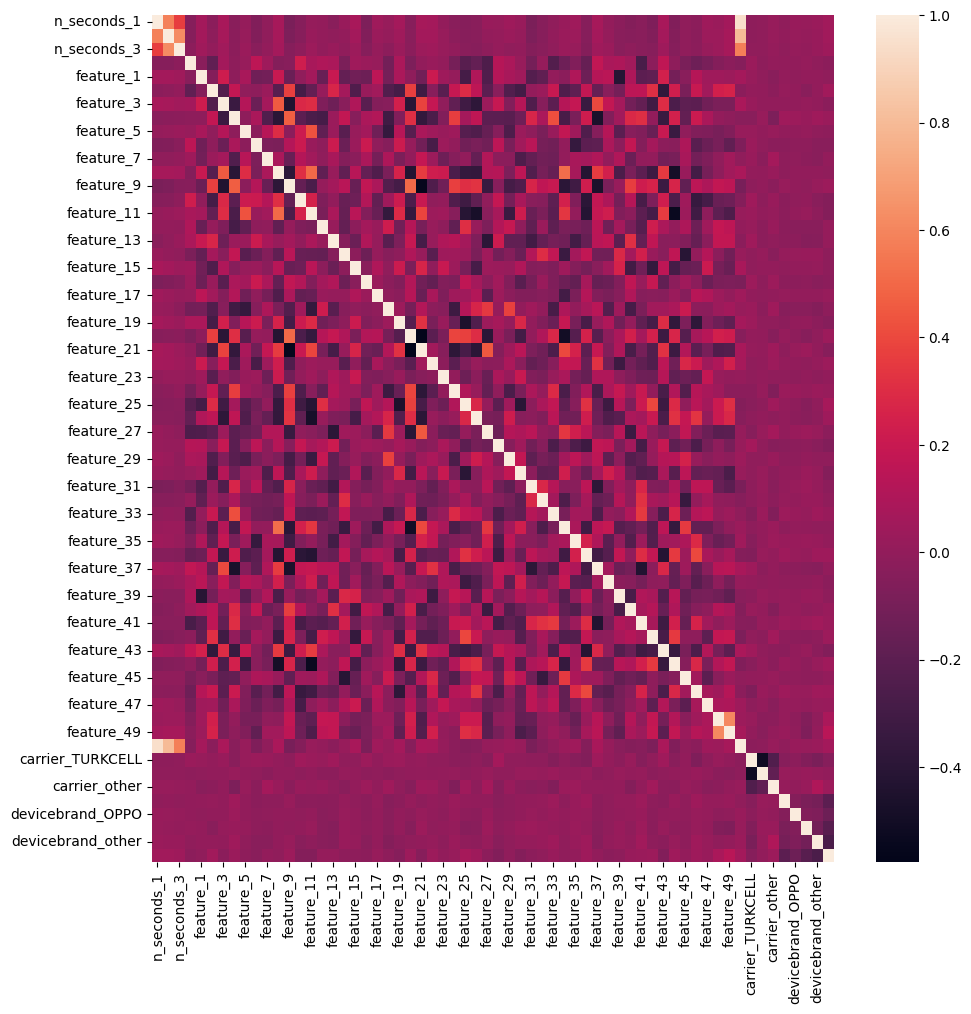

In [141]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [142]:
def correlation(X_test_final, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = X_test_final.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [143]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

1

In [144]:
corr_features

{'total_seconds'}

> PCA


In [145]:
from sklearn.decomposition import PCA


In [146]:

PCA_TR = PCA(n_components=3)
X_train = PCA_TR.fit_transform(X)

In [147]:
PCA_TR.explained_variance_ratio_

array([0.21235685, 0.15355584, 0.08352913])

In [148]:
PCA_TR.components_

array([[ 1.16018251e-03,  1.34015077e-03,  8.82498218e-04,
        -4.98484929e-03, -3.07445677e-03,  5.27449678e-04,
        -3.78073849e-03,  7.27670202e-03, -2.57290517e-03,
        -5.93487945e-03, -5.33858947e-03, -1.72214598e-03,
         3.32516927e-03, -7.98504153e-03, -5.72520456e-03,
        -3.80715816e-03, -9.07449210e-03,  2.63383801e-03,
         8.66276808e-04, -5.20791356e-03,  1.27831301e-04,
        -5.91188185e-03, -6.89295699e-03,  8.32447510e-05,
        -1.73909083e-03,  1.26788316e-03,  9.41959998e-04,
         4.83484953e-03,  4.52236369e-03,  3.11521923e-03,
         5.52259913e-03, -1.14207995e-02, -2.06831144e-04,
         1.70638230e-03,  3.80974074e-03,  2.68400372e-03,
         8.65610608e-03,  7.81470634e-04,  5.64789685e-03,
         9.19311874e-03, -7.54023944e-03, -1.34861860e-03,
         4.68292675e-03, -2.22100173e-03,  8.74627625e-03,
        -3.35675512e-04, -8.60625430e-03,  5.53756946e-03,
        -3.24225562e-04,  1.30309051e-02,  2.42403753e-0

In [149]:
pd.DataFrame(PCA_TR.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3'])

,n_seconds_1,n_seconds_2,n_seconds_3,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_49,total_seconds,carrier_TURKCELL,carrier_VODAFONE TR,carrier_other,devicebrand_HUAWEI,devicebrand_OPPO,devicebrand_Redmi,devicebrand_other,devicebrand_samsung
PC-1,0.001160,0.001340,0.000882,-0.004985,-0.003074,0.000527,-0.003781,0.007277,-0.002573,-0.005935,...,-0.001783,0.001616,-0.775498,0.624672,0.045481,0.011939,0.005853,0.021751,0.042235,0.049764
PC-2,0.005850,0.007905,0.006181,-0.004121,-0.001277,0.014630,-0.009875,0.005187,-0.006002,-0.006383,...,0.054281,0.008750,0.002394,-0.049733,0.015332,-0.108525,-0.045122,-0.139988,-0.258217,0.943038
PC-3,0.007832,0.008973,0.007214,-0.006015,-0.006837,0.004814,-0.013146,0.003282,-0.005524,-0.013624,...,0.027888,0.011067,-0.461919,-0.637765,0.503160,-0.028833,-0.016049,-0.033519,0.340989,0.038012


In [150]:
from sklearn.decomposition import PCA

X = df_.drop('target',axis=1)
Y = df_['target']

PCA_TR = PCA(n_components=3)
z_train = PCA_TR.fit_transform(X)

In [151]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

LRM = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
KNC = KNeighborsClassifier()
NBC = GaussianNB()

SKF = StratifiedKFold(n_splits = 10, shuffle =True, random_state=10)

print(f'LogisticRegression : {round(cross_val_score(LRM,z_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'DecisionTreeClassifier : {round(cross_val_score(DTC,z_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'RandomForestClassifier : {round(cross_val_score(RFC,z_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'KNeighborsClassifier : {round(cross_val_score(KNC,z_train,Y,cv=SKF,scoring="accuracy").mean()*100,2)}%')
print(f'GaussianNB : {round(cross_val_score(NBC,z_train,y,cv=SKF,scoring="accuracy").mean()*100,2)}%')

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

LogisticRegression : 74.44%


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


DecisionTreeClassifier : 85.04%


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


RandomForestClassifier : 85.95%


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


KNeighborsClassifier : 85.79%


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead.

In [ ]:
# Evaluate the model
rmse2 = mean_squared_error(y_test, y_preds, squared=False)
rmse2

In [ ]:
def change_highest_three_to_one(numbers):
    # Sort the list in descending order
    sorted_numbers = sorted(numbers, reverse=True)
    
    # Identify the three highest values
    highest_values = sorted_numbers[:3]
    
    # Replace the three highest values with '1'
    for i in range(len(numbers)):
        if numbers[i] in highest_values:
            numbers[i] = int(1)
        else:
            numbers[i] = int(0)
    
    return numbers

In [ ]:
for i, row in enumerate(y_preds):
    y_preds[i] = change_highest_three_to_one(row)
y_preds = y_preds.astype(int)
y_preds[:10]

In [ ]:
y_pred_sub = []
for row in y_preds:
    string_ints = [str(int) for int in row]
    y_pred_sub.append(''.join(string_ints))
y_pred_sub[:10]

In [ ]:
X_test_final

In [ ]:
indexes = X_test_final['id']
X_test_final.drop(columns='id',inplace=True)
y_test_preds = xg_reg.predict(X_test_final)
y_test_preds

In [ ]:
y_test_preds.shape

In [ ]:
for i, row in enumerate(y_test_preds):
    y_test_preds[i] = change_highest_three_to_one(row)
y_test_preds = y_test_preds.astype(int)
y_test_preds[:10]

In [ ]:
y_test_preds.shape

In [ ]:
y_test_pred_sub = []
for row in y_test_preds:
    string_ints = [str(int) for int in row]
    y_test_pred_sub.append(''.join(string_ints))
y_test_pred_sub[:10]
len(y_test_pred_sub)

In [ ]:
len(indexes)

In [ ]:
df_sub = pd.DataFrame(data={'id':indexes,'target':y_test_pred_sub})
df_sub

In [ ]:
f_path = "/kaggle/working/submission.csv"
if os.path.isfile(f_path):
    os.remove(f_path)

df_sub.to_csv(path_or_buf="/kaggle/working/submission.csv", index=False)

#### OPTUNA 

In [ ]:
!pip install optuna
import optuna

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    param = {
        #'max_depth': trial.suggest_int('max_depth', 1, 10),
        #'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 500, 800)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        #'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        #'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        #'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        #'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        #'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        #'random_state': trial.suggest_int('random_state', 42, 47)
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
# Create the study
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=4) #100

In [ ]:
print('Best parameters', study.best_params)

In [ ]:
# Print the best value
print('Best value', study.best_value)

In [ ]:
# Print the best trial
print('Best trial', study.best_trial)

In [ ]:
#-------------------------------------------------------------------------------------------------

In [ ]:
#################################################################################################